# Скачаем данные

In [15]:
import gdown
import os
import shutil
import subprocess

In [2]:
folder_url = 'https://drive.google.com/drive/folders/1xhnSnmc0HYp0chntMmpcCPPlkTSa7Jo2'
gdown.download_folder(folder_url, quiet=True)

['/content/pop.models/1240K/pops.1240K.modern.txt',
 '/content/pop.models/1240K/v54.1.p1_HO_public.ind',
 '/content/pop.models/1240K/v54.1.p1_HO_public.snp',
 '/content/pop.models/1240K/v54.1.p1_HO_public(1).tar',
 '/content/pop.models/chr21.pca.txt',
 '/content/pop.models/chr22.pca.txt',
 '/content/pop.models/IBS.YRI.MEX.info.txt',
 '/content/pop.models/IBS.YRI.MEX.txt',
 '/content/pop.models/pca.sh',
 '/content/pop.models/pop_models_l3_problems-5.pdf',
 '/content/pop.models/pop_models_l4_problems.pdf',
 '/content/pop.models/pop.model.l3.ipynb']

In [3]:
source_folder = '/content/pop.models'
destination_folder = '/content'
files = os.listdir(source_folder)

for file in files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(destination_folder, file)
    shutil.move(source_path, destination_path)

os.rmdir(source_folder)

In [4]:
!tar -xvf  '/content/1240K/v54.1.p1_HO_public(1).tar' -C '/content/1240K'

v54.1.p1_HO_public.anno
v54.1.p1_HO_public.geno
v54.1.p1_HO_public.snp
v54.1.p1_HO_public.ind


или так (один раз работало, теперь перестало, если снова заработает то нужно заменить пути с ``1240K/v54.1.p1_HO_public`` на ``1240K/v62.0_HO_public``)

In [5]:
!wget "https://dataverse.harvard.edu/api/access/dataset/:persistentId?persistentId=doi:10.7910/DVN/FFIDCW" -O dataset.zip

--2025-02-16 08:01:16--  https://dataverse.harvard.edu/api/access/dataset/:persistentId?persistentId=doi:10.7910/DVN/FFIDCW
Resolving dataverse.harvard.edu (dataverse.harvard.edu)... 34.195.108.60, 98.85.20.200, 44.196.85.112
Connecting to dataverse.harvard.edu (dataverse.harvard.edu)|34.195.108.60|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://rserve.dataverse.harvard.edu/cgi-bin/zipdownload?244-944093b17cbf [following]
--2025-02-16 08:01:17--  https://rserve.dataverse.harvard.edu/cgi-bin/zipdownload?244-944093b17cbf
Resolving rserve.dataverse.harvard.edu (rserve.dataverse.harvard.edu)... 3.225.139.118, 35.173.67.207, 44.213.154.124
Connecting to rserve.dataverse.harvard.edu (rserve.dataverse.harvard.edu)|3.225.139.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘dataset.zip’

dataset.zip             [       <=>          ] 286.91M  5.49MB/s               ^C


In [6]:
!unzip dataset.zip -d 1240K

Archive:  dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataset.zip or
        dataset.zip.zip, and cannot find dataset.zip.ZIP, period.


# Задание 1

Число укоренненых деревьев [можно получить по формуле](https://github.uconn.edu/pages/jet08013/Talks/talk.pdf) $(2n-3)!!$, воспользовавшись ей, посчитаем сколько у нас деревьев:

1. **Гамма функция**

   Для нечетных целых $m = 2n - 3$, $m!!$ можно оценить следующим образом
   
   $$
   m!! = 2^{m/2} \Gamma\left(\frac{m}{2} + 1\right) \sqrt{\frac{2}{\pi}}
   $$
  

2. **Логарифмы**

   Применяя $\log_{10}$ получим:
   $$
   \log_{10}(m!!) = \underbrace{\frac{m}{2} \log_{10}(2)}_{\text{Term 1}} + \underbrace{\log_{10}\left(\Gamma\left(\frac{m}{2} + 1\right)\right)}_{\text{Term 2}} + \underbrace{\frac{1}{2} \left(\log_{10}(2) - \log_{10}(\pi)\right)}_{\text{Term 3}}
   $$

   Где каждое слагаемое можно посчитать отдельно

In [39]:
import math

def log_double_factorial(n):
    m = 2 * n - 3
    if m < 0:
        return 0.0

    half_m = m / 2.0
    gamma_arg = half_m + 1.0

    term1 = half_m * math.log10(2.0)
    term2 = math.lgamma(gamma_arg) / math.log(10.0)
    term3 = 0.5 * (math.log10(2.0) - math.log10(math.pi))

    return term1 + term2 + term3

In [44]:
n = 147
log10_num_trees = log_double_factorial(n)
print(f"log10((2*{n}-3)!!) ≈ {log10_num_trees:.4f}")
print("Roughly 10^(~{:.0f}) distinct rooted trees\n".format(log10_num_trees))

log10((2*147-3)!!) ≈ 296.6893
Roughly 10^(~297) distinct rooted trees



Округляя вверх получим примерно $\sim 10^{297}$ деревьев

# Задание 2


## Admixture
установим Admixture

In [9]:
!apt-get update -qq
!apt-get install -qq -y libopenblas-dev libgsl-dev
!git clone https://github.com/DReichLab/AdmixTools.git
%cd AdmixTools/src
!make
%cd ../..

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libgslcblas0:amd64.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../libgslcblas0_2.7.1+dfsg-3_amd64.deb ...
Unpacking libgslcblas0:amd64 (2.7.1+dfsg-3) ...
Selecting previously unselected package libgsl27:amd64.
Preparing to unpack .../libgsl27_2.7.1+dfsg-3_amd64.deb ...
Unpacking libgsl27:amd64 (2.7.1+dfsg-3) ...
Selecting previously unselected package libgsl-dev.
Preparing to unpack .../libgsl-dev_2.7.1+dfsg-3_amd64.deb ...
Unpacking libgsl-dev (2.7.1+dfsg-3) ...
Setting up libgslcblas0:amd64 (2.7.1+dfsg-3) ...
Setting up libgsl27:amd64 (2.7.1+dfsg-3) ...
Setting up libgsl-dev (2.7.1+dfsg-3) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.r

## Настройка и запуск qp3Pop

Программа qp3Pop из AdmixTools вычисляет f3-статистику в виде:
$$
f_3(\mbox{Outgroup}; \mbox{Pop1, Pop2})
$$

Например, чтобы проверить, кто «ближе» к Russia.HO в популяционном смысле, мы вычисляем:

$$
f_3(\mbox{Mbuti.HO}; \mbox{Russia.HO, Pop})
$$

для ряда выбранных современных неафриканских популяций (например, French.HO, Finnish.HO, Nganasan.HO, Lezgin.HO, Han.HO).

Файл параметров, который нужен qp3Pop, должен включать пути к файлам 1240K, а также «файл популяций», в котором перечислены три популяции (по одной на строку).

In [10]:
!cat /content/AdmixTools/README.3PopTest

DOCUMENTATION OF 3-Population Test (qp3Pop):

The 3-population test, is a formal test of admixture and can provide clear evidence of 
admixture, even if the gene ﬂow events occurred hundreds of generations ago. If we want to test if C has ancestry from populations related to A and B then we can perform the test f3(C; A, B). 
If C is unadmixed, then f3 (C ; A, B) has non-negative mean. If f3 (C ; A, B) has negative mean, in contrast, this implies that C is admixed with popu- 
lations close to A and B (check the significance of the f3 mean and Z-score). 

qp3Pop requires that the input data is available in EIGENSTRAT format.  To convert to the appropriate format, one can use CONVERTF program. See README.CONVERTF for documentation of programs for converting file formats.

Executable and source code:
------------------------------------------------------------------------------
 
For information about installing the program, see README.ADMIXTOOLS. After installing the programs, the executa

In [11]:
def run_qp3pop(populations, parfile="parfile"):
    """
      result_dict keys:
         "f3"     : f3 value (float)
         "std_err": standard error (float)
         "Z"      : Z-score (float)
         "SNPs"   : number of SNPs (int)
      full_output - raw output
    """
    # .HO suffix
    populations = [pop if pop.endswith(".HO") else pop + ".HO" for pop in populations]

    qp3pop_executable = "/content/AdmixTools/src/qp3Pop"

    pop_filename = "pop_list.txt"
    with open(pop_filename, "w") as f:
        f.write(" ".join(populations) + "\n")

    # Parameter file
    with open(parfile, "w") as f:
        f.write("genotypename: /content/1240K/v54.1.p1_HO_public.geno\n")
        f.write("snpname: /content/1240K/v54.1.p1_HO_public.snp\n")
        f.write("indivname: /content/1240K/v54.1.p1_HO_public.ind\n")
        f.write("popfilename: " + pop_filename + "\n")

    # qp3Pop
    proc = subprocess.run([qp3pop_executable, "-p", parfile],
                          capture_output=True,
                          text=True,
                          check=True)

    output = proc.stdout
    result = {}

    for line in output.splitlines():
        if line.lstrip().startswith("result:"):
            tokens = line.split()
            if len(tokens) >= 8:
                result["f3"] = float(tokens[4])
                result["std_err"] = float(tokens[5])
                result["Z"] = float(tokens[6])
                result["SNPs"] = int(tokens[7])
            break

    return result, output

## Кто ближе к Russia.HO

Рассчитаем $f3(\text{Mbuti.HO}; \text{Russia.HO}, X)$ для нескольких современных неафриканских популяций.

- French.HO
- Finnish.HO
- Nganasan.HO
- Lezgin.HO
- Han.HO

In [ ]:
pop_test_list = ["French", "Finnish", "Nganasan", "Lezgin", "Han"]
f3_results = {}

In [ ]:
for pop in pop_test_list:
    pops = ["Mbuti", "Russian", pop]
    result, full_output = run_qp3pop(pops)
    print("f3(Mbuti.HO; Russian.HO, {}.HO):".format(pop))
    print("  f3     = {:.6f}".format(result["f3"]))
    print("  std_err= {:.6f}".format(result["std_err"]))
    print("  Z      = {:.3f}".format(result["Z"]))
    print("  SNPs   = {}".format(result["SNPs"]))
    f3_results[pop] = result

Running qp3Pop tests for f3(Mbuti.HO; Russian.HO, X.HO):

Results for f3(Mbuti.HO; Russian.HO, French.HO):
  f3     = 0.001316
  std_err= 0.000212
  Z      = 6.201
  SNPs   = 510450
Results for f3(Mbuti.HO; Russian.HO, Finnish.HO):
  f3     = 0.003816
  std_err= 0.000495
  Z      = 7.713
  SNPs   = 505942
Results for f3(Mbuti.HO; Russian.HO, Nganasan.HO):
  f3     = 0.114015
  std_err= 0.001388
  Z      = 82.126
  SNPs   = 508714
Results for f3(Mbuti.HO; Russian.HO, Lezgin.HO):
  f3     = 0.002291
  std_err= 0.000468
  Z      = 4.899
  SNPs   = 506823
Results for f3(Mbuti.HO; Russian.HO, Han.HO):
  f3     = 0.076833
  std_err= 0.001110
  Z      = 69.219
  SNPs   = 514296


Положительные значение указывают на отсутствие перемешиваний, высокое значение Z статистики указывает на значимый рузльтат (например для ``Nganasan`` и ``Han``, для них же наблюдаются и самые высокие значения f3)

## Возможно ли построить корневое дерево без примеси для ``Nganasan.HO``, ``French.HO`` и ``Finnish.HO``

Вычислим три f3-статистики

- $f3(\text{Naganasan.HO}, \text{French.HO}, \text{Finnish.HO})$
- $f3(\text{French.HO}, \text{Finnish.HO}, \text{Naganasan.HO})$
- $f3(\text{Finnish.HO}, \text{Naganasan.HO}, \text{French.HO})$

и посмотреть, является ли одна из них отрицательной.

In [ ]:
import itertools

In [ ]:
populations = ["Nganasan.HO", "French.HO", "Finnish.HO"]

In [ ]:
current = populations.copy()

for i in range(3):
    if i != 0:
        current = current[1:] + [current[0]]
    outgroup, pop1, pop2 = current
    result, full_output = run_qp3pop([outgroup, pop1, pop2])
    f3_val = result.get("f3") if result is not None else None
    print("f3({}, {}, {}) = {}".format(outgroup, pop1, pop2, f3_val))
    if f3_val is not None and f3_val < 0:
        print("Negative f3 indicates an admixture signal; a simple tree is not possible.\n")


f3(Nganasan.HO; French.HO, Finnish.HO) = -0.004256
Negative f3 indicates an admixture signal; a simple tree is not possible.

f3(French.HO; Finnish.HO, Nganasan.HO) = 0.150634
f3(Finnish.HO; Nganasan.HO, French.HO) = 0.011546


Заметим что f3 с таргетом `Finnish.HO` выдает отрицательный результат, то есть является результатом смешения популяций `Nganasan.HO` и `French.HO`

Следовательно, построить укорененное дерево  между этими популяциями невозможно.

## Построение корневого дерева для ``Mbuti.HO``, ``French.HO`` и ``Lezgin.HO`` и вычисление весов ребер

Теперь предположим, что мы хотим построить корневое дерево с этими тремя популяциями. Сначала мы проверяем, что нет никаких признаков смешивания, гарантируя, что все f3-статистики неотрицательны.

Затем можно «назначить» веса ребер следующим образом. В дереве без смешивания значение $f3(\text{Mbuti.HO}, A, B)$ пропорционально длине ветви, общей для популяций A и B (после того, как они отделились от внешней группы).

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

In [13]:
populations = ["Mbuti.HO", "French.HO", "Lezgin.HO"]

f3_results = {}

In [16]:
current = populations.copy()

for i in range(3):
    if i != 0:
        current = current[1:] + [current[0]]
    outgroup, pop1, pop2 = current
    result, full_output = run_qp3pop([outgroup, pop1, pop2])
    f3_val = result.get("f3") if result is not None else None
    f3_results[(outgroup, pop1, pop2)] = f3_val
    print("f3({}, {}, {}) = {}".format(outgroup, pop1, pop2, f3_val))
    if f3_val is not None and f3_val < 0:
        print("Negative f3 indicates an admixture signal; a simple tree is not possible.\n")

f3(Mbuti.HO, French.HO, Lezgin.HO) = 0.002297
f3(French.HO, Lezgin.HO, Mbuti.HO) = 0.250941
f3(Lezgin.HO, Mbuti.HO, French.HO) = 0.007832


Получив все наобходимые значения можно перейти к построению дерева

In [33]:
import numpy as np
from scipy.cluster.hierarchy import linkage, to_tree, dendrogram
import matplotlib.pyplot as plt

In [34]:
# dist matrix
f3_L = f3_results.get(("Mbuti.HO", "French.HO", "Lezgin.HO"))
f3_M = f3_results.get(("French.HO", "Lezgin.HO", "Mbuti.HO"))
f3_F = f3_results.get(("Lezgin.HO", "Mbuti.HO", "French.HO"))

distance_matrix = np.array([
    [0,     f3_L, f3_F],
    [f3_L,  0,    f3_M],
    [f3_F,  f3_M, 0]
])

In [35]:
populations = ["Lezgin.HO", "French.HO", "Mbuti.HO"]

condensed = [distance_matrix[i, j] for i in range(len(populations)) for j in range(i+1, len(populations))]

Z = linkage(condensed, method='average')

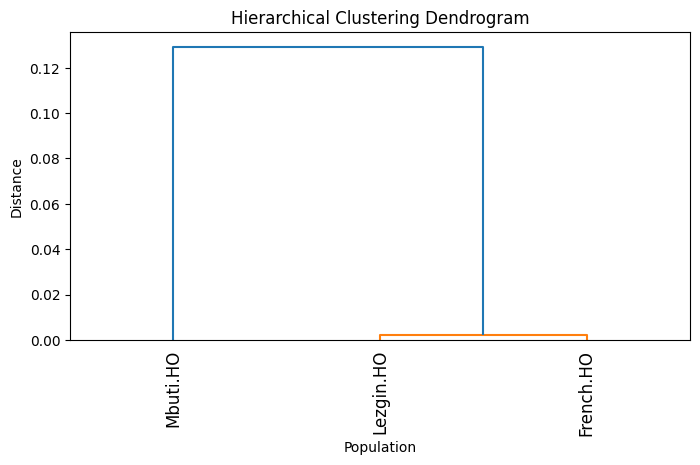

In [36]:
plt.figure(figsize=(8, 4))
dendro = dendrogram(Z, labels=populations, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Population")
plt.ylabel("Distance")
plt.show()

Данное дерево соответствует общеизвестным представлениями. Mbuti - один из старейших коренных народов Африки (на территории современного Конго), French - европейская популяция, Lezgin - популяция Северного Кавказа.

Можно также выгрузить данные из построенного дерева, но, вероятно, лучше строить деревья пользуясь специализированными программами

In [37]:
root_node, node_list = to_tree(Z, rd=True)

def print_tree(node, parent_dist=0, indent=""):
    if node.id < len(populations):
        branch_length = parent_dist
        print(indent + f"Leaf: {populations[node.id]} (branch length: {branch_length:.4f})")
    else:
        branch_length = parent_dist - node.dist if parent_dist > 0 else 0
        print(indent + f"Internal Node {node.id} (branch length: {branch_length:.4f}, node distance: {node.dist:.4f})")
        if node.left:
            print_tree(node.left, node.dist, indent + "  ")
        if node.right:
            print_tree(node.right, node.dist, indent + "  ")
print_tree(root_node, parent_dist=root_node.dist)

Internal Node 4 (branch length: 0.0000, node distance: 0.1294)
  Leaf: Mbuti.HO (branch length: 0.1294)
  Internal Node 3 (branch length: 0.1271, node distance: 0.0023)
    Leaf: Lezgin.HO (branch length: 0.0023)
    Leaf: French.HO (branch length: 0.0023)
